In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib 

# scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from skimage.transform import resize

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Görsel
import seaborn as sns

# Torch
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/tljh/user/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/tljh/user/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/tljh/user/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/opt/tljh/user/lib/python3.9/site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/tljh/user/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/tljh/user/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/tljh/user/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/opt/tljh/user/lib/python3.9/site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/tljh/user/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/tljh/user/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/tljh/user/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/tljh/user/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
    app.start()
  File "/opt/tljh/user/lib/python3.9/site-pack

AttributeError: _ARRAY_API not found

2024-12-01 18:45:47.426149: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 18:45:47.444328: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733067947.464009 4047898 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733067947.469524 4047898 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 18:45:47.491077: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Tüm görüntüleri 32x32 boyutuna yeniden boyutlandırmak için dönüşüm
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Görüntüleri 32x32 boyutuna ayarla
    transforms.ToTensor()         # Görüntüleri tensöre çevir
])

In [3]:
# Eğitim veri setini indir ve yükle
train_dataset = datasets.GTSRB(
    root='./data', split='train', download=True, transform=transform
)

# Test veri setini indir ve yükle
test_dataset = datasets.GTSRB(
    root='./data', split='test', download=True, transform=transform
)


In [4]:
# Eğitim ve etiketlerini numpy formatına dönüştür
train_data = np.array([np.array(img.permute(1, 2, 0)) for img, label in train_dataset])
train_labels = np.array([label for _, label in train_dataset])

# Test verisi ve etiketlerini numpy formatına dönüştür
test_data = np.array([np.array(img.permute(1, 2, 0)) for img, label in test_dataset])
test_labels = np.array([label for _, label in test_dataset])

In [5]:
# Veri setindeki örnekleri kontrol et
missing_data_count = sum(1 for i in range(len(train_dataset)) if train_dataset[i][0] is None or train_dataset[i][1] is None)

print(f"Eksik veri bulunan örnek sayısı: {missing_data_count}")

missing_data_count_test = sum(1 for i in range(len(test_dataset)) if test_dataset[i][0] is None or test_dataset[i][1] is None)

print(f"Eksik veri bulunan örnek sayısı: {missing_data_count_test}")


Eksik veri bulunan örnek sayısı: 0
Eksik veri bulunan örnek sayısı: 0


In [6]:
# Veriyi %80 eğitim, %20 test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


# Verilerin boyutlarını kontrol et
print(f"Eğitim verisi boyutu: {X_train.shape}, Eğitim etiketleri boyutu: {y_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}, Test etiketleri boyutu: {y_test.shape}")

Eğitim verisi boyutu: (21312, 32, 32, 3), Eğitim etiketleri boyutu: (21312,)
Test verisi boyutu: (5328, 32, 32, 3), Test etiketleri boyutu: (5328,)


In [7]:
##Özellik Ölçekleme (Feature Scaling):

# Veriyi standartlaştırma (feature scaling) işlemi
scaler = StandardScaler()

# Eğitim verisini ölçeklendir
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))  # Görüntüleri 1D dizilere dönüştür

# Test verisini ölçeklendir
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))  # Test verisini aynı scaler ile dönüştür

# Boyutları kontrol et
print(f"Ölçeklendirilmiş eğitim verisi boyutu: {X_train_scaled.shape}")
print(f"Ölçeklendirilmiş test verisi boyutu: {X_test_scaled.shape}")


Ölçeklendirilmiş eğitim verisi boyutu: (21312, 3072)
Ölçeklendirilmiş test verisi boyutu: (5328, 3072)


In [ ]:
##Eğitim veri kümesinde 21.312 adet görüntü bulunmaktadır.her bir görüntü 3072 özellikten oluşan bir vektöre dönüştürüldü.Test veri kümesinde 5.328 adet görüntü bulunmaktadır.

In [ ]:
# MLPClassifier modelini oluşturma
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)

# Modeli eğitim verisi ile eğitme
mlp_model.fit(X_train_scaled, y_train)

# Eğitim tamamlandıktan sonra doğruluğu değerlendirme
train_accuracy = mlp_model.score(X_train_scaled, y_train)
test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"Eğitim doğruluğu: {train_accuracy * 100:.2f}%")
print(f"Test doğruluğu: {test_accuracy * 100:.2f}%")


In [ ]:
##Aşırı Uyumun Önlenmesi . max_iter parametresini artırarak daha fazla iterasyonla eğitimi deniyoruz.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Modeli oluştururken max_iter'ı artırarak daha fazla iterasyonla eğitime devam ediyoruz
# Ayrıca tol parametresi ile doğruluk iyileşmesi durduğunda eğitim duracaktır.

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), 
                          activation='relu', 
                          solver='adam', 
                          learning_rate_init=0.001, 
                          max_iter=500,  
                          tol=1e-4,      
                          alpha=0.001,  # L2 Regularization
                          early_stopping=True,  # Early stopping
                          random_state=42)

# Modeli eğitim verileriyle eğitiyoruz
mlp_model.fit(X_train_scaled, y_train)

# Eğitim ve test doğruluklarını hesaplayalım
train_accuracy = mlp_model.score(X_train_scaled, y_train)
test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"Eğitim doğruluğu: {train_accuracy * 100:.2f}%")
print(f"Test doğruluğu: {test_accuracy * 100:.2f}%")


In [ ]:
#Modeli Kaydetme

from joblib import dump, load

dump(mlp_model, 'mlp_classifier_model.joblib')
print("MLPClassifier modeli kaydedildi.")

In [ ]:
# Eğitim ve test veri boyutlarını kontrol et
print(f"Eğitim verisi boyutu (özellikler): {X_train.shape}")
print(f"Eğitim etiketi boyutu: {y_train.shape}")
print(f"Test verisi boyutu (özellikler): {X_test.shape}")
print(f"Test etiketi boyutu: {y_test.shape}")

# Ölçeklendirilmiş veri boyutlarını kontrol et
print(f"Ölçeklendirilmiş eğitim verisi boyutu: {X_train_scaled.shape}")
print(f"Ölçeklendirilmiş test verisi boyutu: {X_test_scaled.shape}")


In [ ]:
#RBF
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Parametreler için bir sınıf (class) oluşturuyoruz
class ModelParams:
    def __init__(self, kernel='rbf', gamma='scale', C=1.0, random_state=42):
        self.kernel = kernel
        self.gamma = gamma
        self.C = C
        self.random_state = random_state

# Parametreler nesnesi oluşturuyoruz
params = ModelParams(kernel='rbf', gamma='scale', C=1.0, random_state=42)

# Veriyi %80 eğitim, %20 test olarak ayırma (Bu kısım zaten önceki kodda yapılmış)
# X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Özellik Ölçekleme (Feature Scaling) işlemi
scaler = StandardScaler()

# Eğitim verisini ölçeklendiriyoruz (Eğitim verisi reshape edildiği için önceki şekli korunmuş)
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))  

# Test verisini ölçeklendiriyoruz
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))  

# Modeli oluştururken parametreler nesnesini kullanıyoruz
svm_rbf_model = SVC(kernel=params.kernel, gamma=params.gamma, C=params.C, random_state=params.random_state)

# Modeli eğitim verisi ile eğitme
svm_rbf_model.fit(X_train_scaled, y_train)

# Eğitim ve test doğruluklarını hesaplayalım
train_accuracy = svm_rbf_model.score(X_train_scaled, y_train)
test_accuracy = svm_rbf_model.score(X_test_scaled, y_test)

# Sonuçları yazdıralım
print(f"Eğitim doğruluğu: {train_accuracy * 100:.2f}%")
print(f"Test doğruluğu: {test_accuracy * 100:.2f}%")


In [ ]:
# Eğitilen SVC modelini kaydedelim
dump(svm_rbf_model, 'svm_rbf_classifier_model.joblib')
print("SVC model kaydedildi.")

In [8]:
from joblib import load

# Eğitilmiş modelleri yükleme
mlp_model = load('mlp_classifier_model.joblib')
svm_rbf_model = load('svm_rbf_classifier_model.joblib')


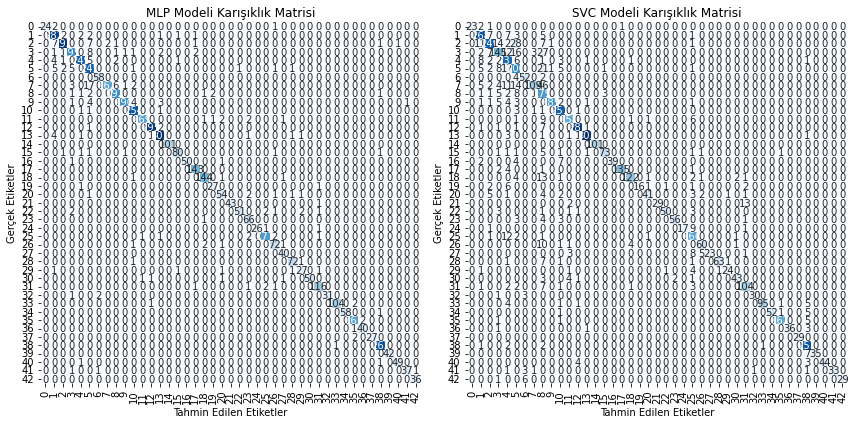

In [9]:
##CONFUSION MATRIX
# Gerekli kütüphaneleri import ediyoruz
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. MLP Modeli için tahminler
mlp_predictions = mlp_model.predict(X_test_scaled)

# 2. SVC Modeli için tahminler
svm_rbf_predictions = svm_rbf_model.predict(X_test_scaled)

# 3. Her iki model için karışıklık matrisi oluşturuluyor
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
svm_rbf_conf_matrix = confusion_matrix(y_test, svm_rbf_predictions)

# 4. Karışıklık matrislerini görselleştirelim

# MLP Modeli için karışıklık matrisini çiziyoruz
plt.figure(figsize=(12, 6))

# MLP Karışıklık Matrisi
plt.subplot(1, 2, 1)
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(mlp_conf_matrix.shape[0]), yticklabels=range(mlp_conf_matrix.shape[0]))
plt.title('MLP Modeli Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')

# SVC Modeli için karışıklık matrisini çiziyoruz
plt.subplot(1, 2, 2)
sns.heatmap(svm_rbf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=range(svm_rbf_conf_matrix.shape[0]), yticklabels=range(svm_rbf_conf_matrix.shape[0]))
plt.title('SVC Modeli Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')

# Görselleştirmeyi göster
plt.tight_layout()
plt.show()


In [10]:
from sklearn.metrics import classification_report

# 1. MLP Modeli için tahminler
mlp_predictions = mlp_model.predict(X_test_scaled)

# 2. SVC Modeli için tahminler
svm_rbf_predictions = svm_rbf_model.predict(X_test_scaled)

# 3. Performans metriklerini hesaplayalım (accuracy, precision, recall, F1-score)

# MLP Modeli için performans metrikleri
mlp_report = classification_report(y_test, mlp_predictions, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("MLP Modeli Performans Metrikleri:\n")
print(mlp_report)

# SVC Modeli için performans metrikleri
svm_rbf_report = classification_report(y_test, svm_rbf_predictions, target_names=[str(i) for i in range(len(np.unique(y_test)))])
print("SVC Modeli Performans Metrikleri:\n")
print(svm_rbf_report)


MLP Modeli Performans Metrikleri:

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        27
           1       0.92      0.97      0.94       291
           2       0.98      0.94      0.96       313
           3       0.93      0.92      0.92       212
           4       0.97      0.95      0.96       262
           5       0.83      0.94      0.88       261
           6       0.95      1.00      0.97        58
           7       0.99      0.85      0.91       191
           8       0.95      0.96      0.96       200
           9       0.98      0.94      0.96       203
          10       0.96      0.99      0.97       257
          11       0.99      0.96      0.97       176
          12       0.99      0.99      0.99       298
          13       0.97      0.97      0.97       310
          14       1.00      1.00      1.00       101
          15       0.96      0.93      0.95        86
          16       1.00      0.96      0.98   

In [ ]:
##MLPClassifier

from joblib import load
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Eğitilmiş MLPClassifier modelini yükleme
mlp_model = load('mlp_classifier_model.joblib')

# Eğitim ve test verileri (verilerinizi burada belirtin)
# X_train_scaled, X_test_scaled, y_train, y_test 

# Modelin doğruluğunu yeniden kontrol edelim
mlp_train_accuracy = mlp_model.score(X_train_scaled, y_train)
mlp_test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"MLP Eğitim doğruluğu: {mlp_train_accuracy * 100:.2f}%")
print(f"MLP Test doğruluğu: {mlp_test_accuracy * 100:.2f}%")

# MLP için parametre araması yapalım (daraltılmış parametrelerle)
mlp_param_dist = {
    'hidden_layer_sizes': [(128, 64)],  # Daha küçük model
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate_init': [0.001],
    'max_iter': [200],  # Daha kısa iterasyon sayısı
    'alpha': [0.01],
    'early_stopping': [True],
}

# MLP RandomizedSearchCV
mlp_random_search = RandomizedSearchCV(MLPClassifier(random_state=42), mlp_param_dist,
                                       n_iter=3, cv=2, n_jobs=-1, verbose=0, random_state=42)
mlp_random_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdırma
print("En iyi MLP parametreleri:", mlp_random_search.best_params_)

# Test doğruluğunu hesaplama
best_mlp_model = mlp_random_search.best_estimator_
mlp_test_accuracy_optimized = best_mlp_model.score(X_test_scaled, y_test)
print(f"Optimizasyon sonrası MLP Test doğruluğu: {mlp_test_accuracy_optimized * 100:.2f}%")


In [14]:
#2.DENEME
from joblib import load
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Eğitilmiş MLPClassifier modelini yükleme
mlp_model = load('mlp_classifier_model.joblib')

# Eğitim ve test verileri (verilerinizi burada belirtin)
# X_train_scaled, X_test_scaled, y_train, y_test 

# Modelin doğruluğunu yeniden kontrol edelim
mlp_train_accuracy = mlp_model.score(X_train_scaled, y_train)
mlp_test_accuracy = mlp_model.score(X_test_scaled, y_test)

print(f"MLP Eğitim doğruluğu: {mlp_train_accuracy * 100:.2f}%")
print(f"MLP Test doğruluğu: {mlp_test_accuracy * 100:.2f}%")

# Parametre arama alanını genişletiyoruz
mlp_param_dist = {
    'hidden_layer_sizes': [(128, 64), (256, 128), (512, 256), (128, 64, 32)],  # Daha fazla kombinasyon
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 500],
    'alpha': [0.01, 0.001],
    'early_stopping': [True],
}

# MLP RandomizedSearchCV - Parametre aramasını 5 iterasyonla yapıyoruz
mlp_random_search = RandomizedSearchCV(MLPClassifier(random_state=42), mlp_param_dist,
                                       n_iter=5, cv=2, n_jobs=-1, verbose=1, random_state=42)
mlp_random_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdırma
print("En iyi MLP parametreleri:", mlp_random_search.best_params_)

# Test doğruluğunu hesaplama
best_mlp_model = mlp_random_search.best_estimator_
mlp_test_accuracy_optimized = best_mlp_model.score(X_test_scaled, y_test)
print(f"Optimizasyon sonrası MLP Test doğruluğu: {mlp_test_accuracy_optimized * 100:.2f}%")


MLP Eğitim doğruluğu: 98.77%
MLP Test doğruluğu: 95.74%
Fitting 2 folds for each of 5 candidates, totalling 10 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/tljh/user/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/tljh/user/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/jupyter-nurdan.ekmen/.local/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/opt/tljh/user/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/

En iyi MLP parametreleri: {'solver': 'sgd', 'max_iter': 200, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (256, 128), 'early_stopping': True, 'alpha': 0.001, 'activation': 'relu'}
Optimizasyon sonrası MLP Test doğruluğu: 97.03%


In [16]:
# Sonuçları dosyaya kaydetme
with open("mlp_results.txt", "w") as file:
    file.write(f"MLP Eğitim doğruluğu: {mlp_train_accuracy * 100:.2f}%\n")
    file.write(f"MLP Test doğruluğu: {mlp_test_accuracy * 100:.2f}%\n")
    file.write(f"En iyi MLP parametreleri: {mlp_random_search.best_params_}\n")  # En iyi parametreler
    file.write(f"Optimizasyon sonrası MLP Test doğruluğu: {mlp_test_accuracy_optimized * 100:.2f}%\n")

In [11]:
from joblib import load
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Eğitilmiş SVC modelini yükleme
svc_model = load('svm_rbf_classifier_model.joblib')

# Eğitim ve test verileri (verilerinizi burada belirtin)
# X_train_scaled, X_test_scaled, y_train, y_test 

# Modelin doğruluğunu yeniden kontrol edelim
svc_train_accuracy = svc_model.score(X_train_scaled, y_train)
svc_test_accuracy = svc_model.score(X_test_scaled, y_test)

# Parametre arama alanını genişletiyoruz
svm_param_dist = {
    'C': [0.1, 1, 10, 100],  # Regularization parametresi
    'gamma': ['scale', 'auto', 0.001, 0.01],  # Kernel parametresi
    'kernel': ['rbf', 'linear'],  # Kernel tipi
    'degree': [3, 4, 5],  # Polinom kernel için derece
}

# SVC RandomizedSearchCV - Parametre aramasını 5 iterasyonla yapıyoruz
svc_random_search = RandomizedSearchCV(SVC(random_state=42), svm_param_dist,
                                       n_iter=5, cv=2, n_jobs=-1, verbose=1, random_state=42)
svc_random_search.fit(X_train_scaled, y_train)

# En iyi parametreleri yazdırma
best_svc_params = svc_random_search.best_params_

# Test doğruluğunu hesaplama
best_svc_model = svc_random_search.best_estimator_
svc_test_accuracy_optimized = best_svc_model.score(X_test_scaled, y_test)

# Sonuçları yazdırma
print(f"SVC Eğitim doğruluğu: {svc_train_accuracy * 100:.2f}%")
print(f"SVC Test doğruluğu: {svc_test_accuracy * 100:.2f}%")
print("En iyi SVC parametreleri:", best_svc_params)
print(f"Optimizasyon sonrası SVC Test doğruluğu: {svc_test_accuracy_optimized * 100:.2f}%")


Fitting 2 folds for each of 5 candidates, totalling 10 fits



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/tljh/user/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/tljh/user/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/jupyter-nurdan.ekmen/.local/lib/python3.9/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/opt/tljh/user/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/

SVC Eğitim doğruluğu: 89.13%
SVC Test doğruluğu: 86.52%
En iyi SVC parametreleri: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 100}
Optimizasyon sonrası SVC Test doğruluğu: 98.12%


In [13]:
# Sonuçları bir dosyaya kaydetme
with open("svc_results.txt", "w") as file:
    file.write(f"SVC Eğitim doğruluğu: {svc_train_accuracy * 100:.2f}%\n")
    file.write(f"SVC Test doğruluğu: {svc_test_accuracy * 100:.2f}%\n")
    file.write(f"En iyi SVC parametreleri: {svc_random_search.best_params_}\n") 
    file.write(f"Optimizasyon sonrası SVC Test doğruluğu: {svc_test_accuracy_optimized * 100:.2f}%\n")


In [ ]:
##GORSELLESTIRME

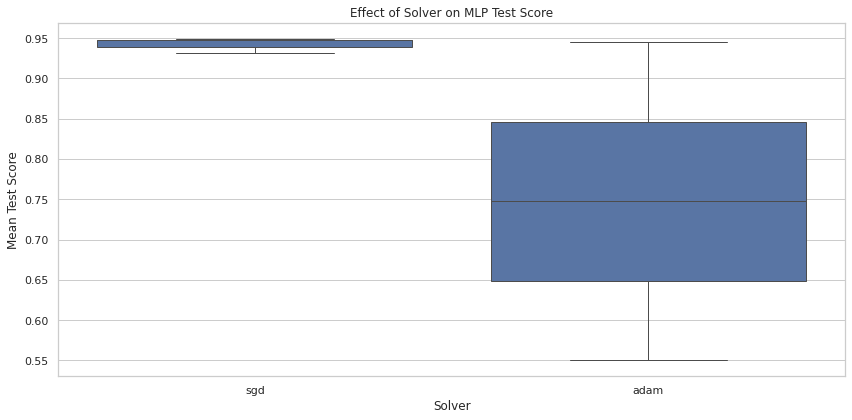

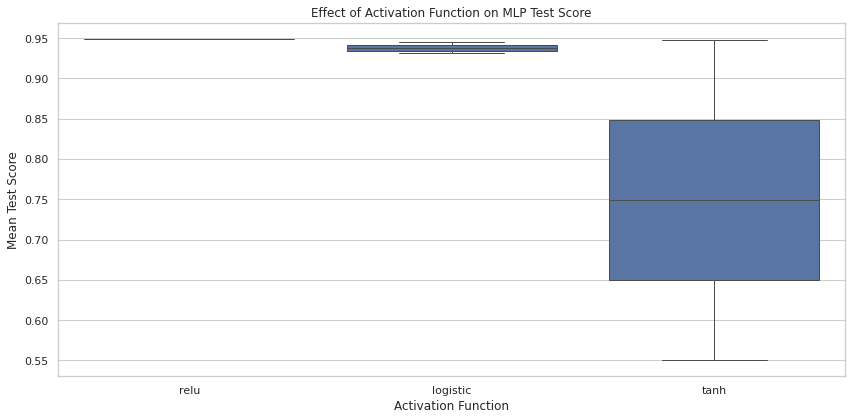

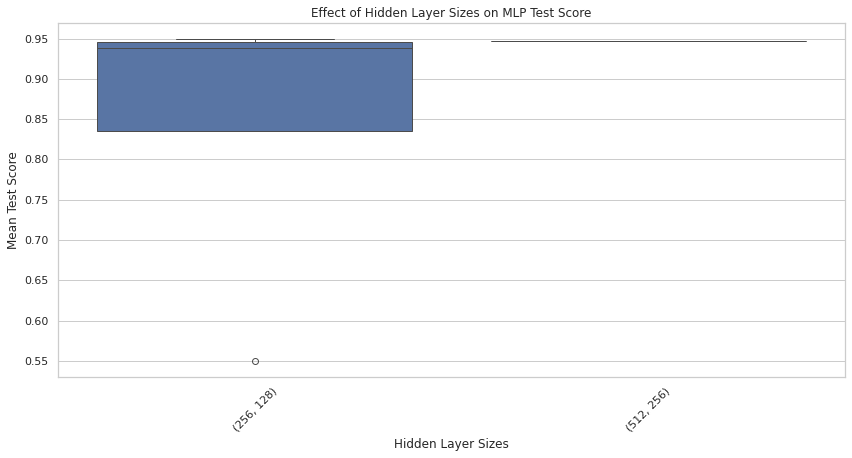

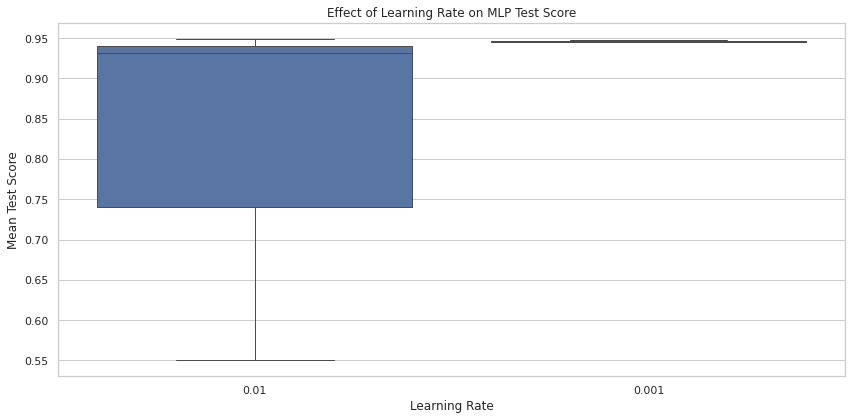

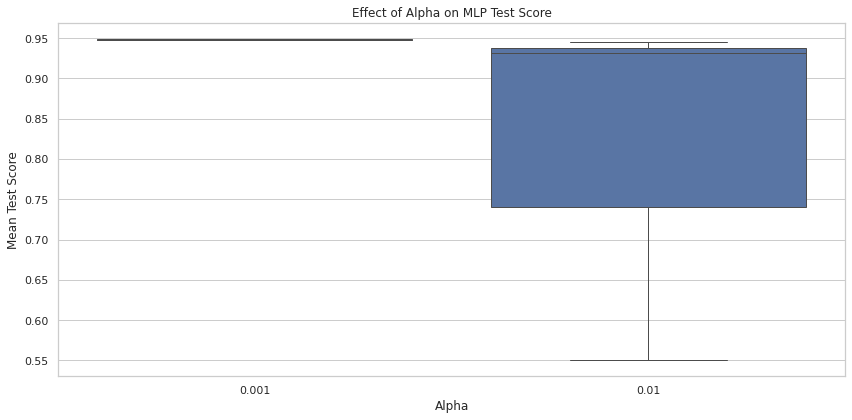

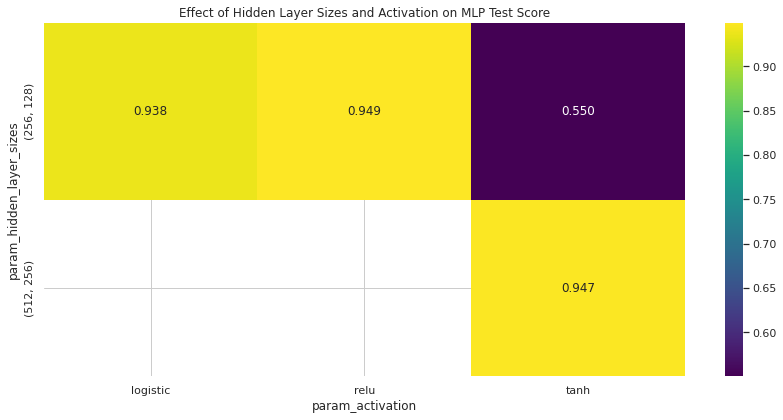

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veri görselleştirme için gerekli ayarlar
sns.set(style="whitegrid")

# MLP RandomizedSearchCV sonuçlarını DataFrame'e çevirme
mlp_results = pd.DataFrame(mlp_random_search.cv_results_)

# Parametrelerin türlerini string'e dönüştürme (kategori verilerinin düzgün işlenmesi için)
mlp_results['param_hidden_layer_sizes'] = mlp_results['param_hidden_layer_sizes'].astype(str)
mlp_results['param_activation'] = mlp_results['param_activation'].astype(str)
mlp_results['param_solver'] = mlp_results['param_solver'].astype(str)
mlp_results['param_learning_rate_init'] = mlp_results['param_learning_rate_init'].astype(str)
mlp_results['param_alpha'] = mlp_results['param_alpha'].astype(str)

# 1. Farklı `solver` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_solver', y='mean_test_score', data=mlp_results)
plt.title('Effect of Solver on MLP Test Score')
plt.xlabel('Solver')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 2. Farklı `activation` fonksiyonlarının test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_activation', y='mean_test_score', data=mlp_results)
plt.title('Effect of Activation Function on MLP Test Score')
plt.xlabel('Activation Function')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 3. Farklı `hidden_layer_sizes` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_hidden_layer_sizes', y='mean_test_score', data=mlp_results)
plt.title('Effect of Hidden Layer Sizes on MLP Test Score')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.xticks(rotation=45)  # X eksenindeki etiketleri döndürme
plt.show()

# 4. `learning_rate_init` parametresinin etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_learning_rate_init', y='mean_test_score', data=mlp_results)
plt.title('Effect of Learning Rate on MLP Test Score')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 5. `alpha` parametresinin etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_alpha', y='mean_test_score', data=mlp_results)
plt.title('Effect of Alpha on MLP Test Score')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 6. Parametre Kombinasyonlarına Göre Performans Değişimi: 
# Hidden Layer Sizes ve Activation parametrelerinin etkileşimini görselleştiriyoruz
plt.figure(figsize=(12, 6))
sns.heatmap(mlp_results.pivot_table('mean_test_score', 'param_hidden_layer_sizes', 'param_activation'),
            annot=True, cmap='viridis', fmt='.3f')
plt.title('Effect of Hidden Layer Sizes and Activation on MLP Test Score')
plt.tight_layout()
plt.show()


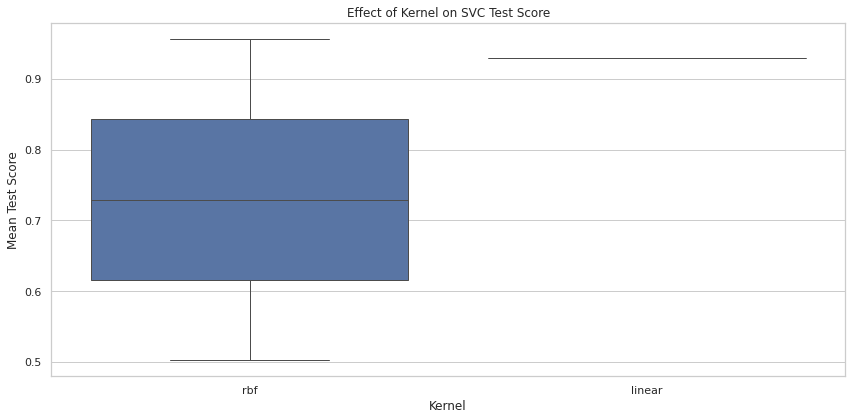

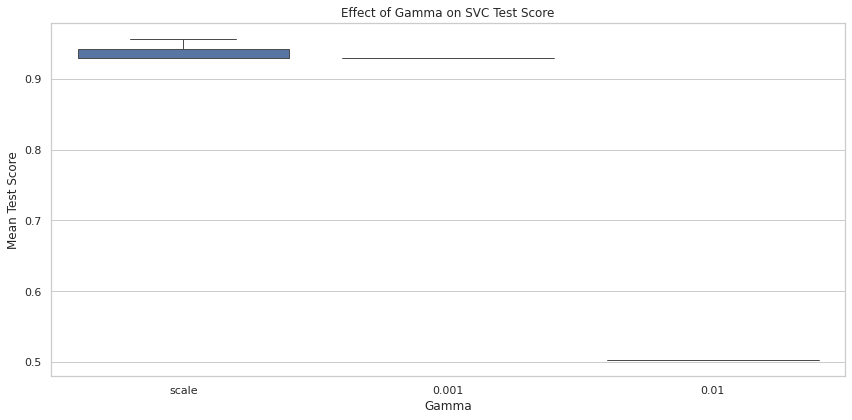

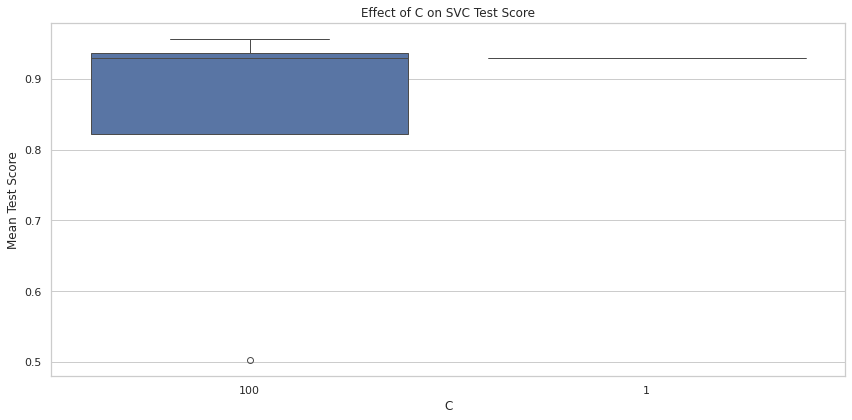

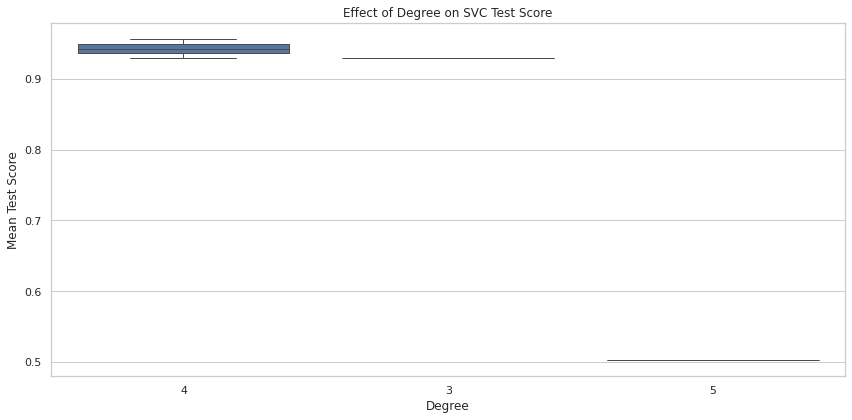

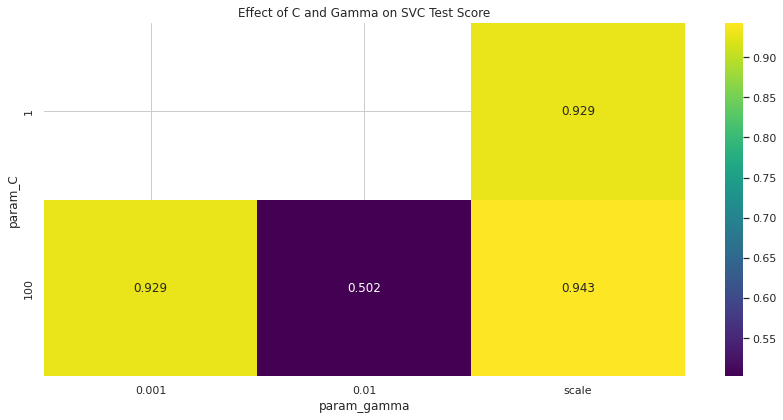

En iyi SVC parametreleri: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 100}


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veri görselleştirme için gerekli ayarlar
sns.set(style="whitegrid")

# SVC RandomizedSearchCV sonuçlarını DataFrame'e çevirme
svc_results = pd.DataFrame(svc_random_search.cv_results_)

# Parametrelerin türlerini string'e dönüştürme (kategori verilerinin düzgün işlenmesi için)
svc_results['param_kernel'] = svc_results['param_kernel'].astype(str)
svc_results['param_gamma'] = svc_results['param_gamma'].astype(str)
svc_results['param_degree'] = svc_results['param_degree'].astype(str)
svc_results['param_C'] = svc_results['param_C'].astype(str)

# 1. Farklı `kernel` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_kernel', y='mean_test_score', data=svc_results)
plt.title('Effect of Kernel on SVC Test Score')
plt.xlabel('Kernel')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 2. Farklı `gamma` parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_gamma', y='mean_test_score', data=svc_results)
plt.title('Effect of Gamma on SVC Test Score')
plt.xlabel('Gamma')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 3. Farklı `C` (Regularization) parametrelerinin test skoru üzerindeki etkisi
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_C', y='mean_test_score', data=svc_results)
plt.title('Effect of C on SVC Test Score')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 4. Farklı `degree` parametrelerinin test skoru üzerindeki etkisi (sadece polinom kernel için)
plt.figure(figsize=(12, 6))
sns.boxplot(x='param_degree', y='mean_test_score', data=svc_results)
plt.title('Effect of Degree on SVC Test Score')
plt.xlabel('Degree')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# 5. `C` ve `gamma` parametrelerinin etkileşimini görselleştirelim
plt.figure(figsize=(12, 6))
sns.heatmap(svc_results.pivot_table('mean_test_score', 'param_C', 'param_gamma'),
            annot=True, cmap='viridis', fmt='.3f')
plt.title('Effect of C and Gamma on SVC Test Score')
plt.tight_layout()
plt.show()

# 6. En iyi parametreleri yazdıralım
print(f"En iyi SVC parametreleri: {best_svc_params}")

# 7. SVC RandomizedSearchCV sonuçlarını dosyaya kaydedelim
svc_results.to_csv("svc_random_search_results.csv", index=False)

# 8. Sonuçları dosyaya kaydetme
with open("svc_results.txt", "w") as file:
    file.write(f"SVC Eğitim doğruluğu: {svc_train_accuracy * 100:.2f}%\n")
    file.write(f"SVC Test doğruluğu: {svc_test_accuracy * 100:.2f}%\n")
    file.write(f"En iyi SVC parametreleri: {best_svc_params}\n")  # En iyi parametreler
    file.write(f"Optimizasyon sonrası SVC Test doğruluğu: {svc_test_accuracy_optimized * 100:.2f}%\n")  
